The dataset consists of 10 variables:
* **step**: represents a unit of time where 1 step equals 1 hour
* **type**: type of online transaction
* **amount**: the amount of the transaction
* **nameOrig**: customer starting the transaction
* **oldbalanceOrg**: balance before the transaction
* **newbalanceOrig**: balance after the transaction
* **nameDest**: recipient of the transaction
* **oldbalanceDest**: initial balance of recipient before the transaction
* **newbalanceDest**: the new balance of recipient after the transaction
* **isFraud**: fraud transactiontransaction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf
import os
df = pd.read_csv('onlinefraud.csv')

In [2]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1953339,178,PAYMENT,452.88,C473262338,39240.00,38787.12,M1810416565,0.00,0.00,0,0
2947913,230,CASH_OUT,145681.97,C1591030777,0.00,0.00,C422513612,1956904.48,2102586.44,0,0
3623240,274,PAYMENT,2074.21,C501085672,106391.00,104316.79,M1712096012,0.00,0.00,0,0
3170607,238,CASH_IN,96299.19,C266678626,2314979.66,2411278.85,C1343559715,842320.35,746021.16,0,0
370885,17,CASH_IN,64448.54,C2125190789,29972.00,94420.54,C1661453412,537556.26,194635.41,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.drop('isFlaggedFraud',axis =1,inplace=True)

In [5]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2957717,230,CASH_OUT,42607.16,C559662239,0.00,0.00,C620247281,31730801.02,31773408.18,0
1039315,94,PAYMENT,2651.18,C1601262364,20015.00,17363.82,M1495753032,0.00,0.00,0
1917128,166,PAYMENT,3338.99,C115160270,967698.00,964359.01,M1453280335,0.00,0.00,0
2175971,185,CASH_IN,193873.26,C2101247947,36217.32,230090.58,C116363521,1969179.34,1775306.08,0
2232593,186,CASH_OUT,65204.13,C186447866,16323.00,0.00,C824082199,0.00,65204.13,0


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
fraud_min_max = [
    ['amount',df.amount.min(),df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers = ['columns','min_value','max_value'],
        showindex = True,
        tablefmt = 'github',
        numalign='right'
    )
)

|    | columns        |   min_value |   max_value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 | 9.24455e+07 |
|  1 | oldbalanceOrg  |           0 |  5.9585e+07 |
|  2 | newbalanceOrig |           0 |  4.9585e+07 |
|  3 | oldbalanceDest |           0 | 3.56016e+08 |
|  4 | isFraud        |           0 |           1 |


In [9]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [10]:
df.duplicated().sum()

0

In [11]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

UNIVARIATE DATA VISUALIZATION
</h2>

In [12]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


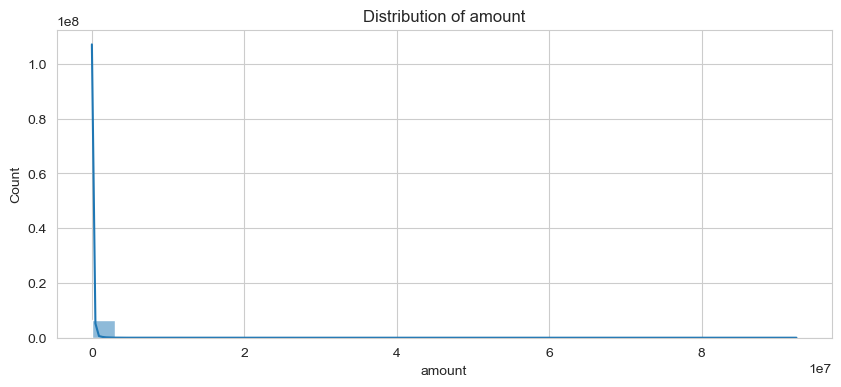

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


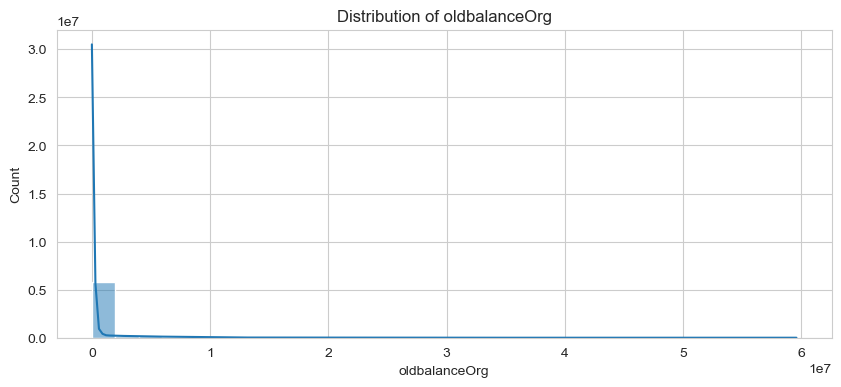

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


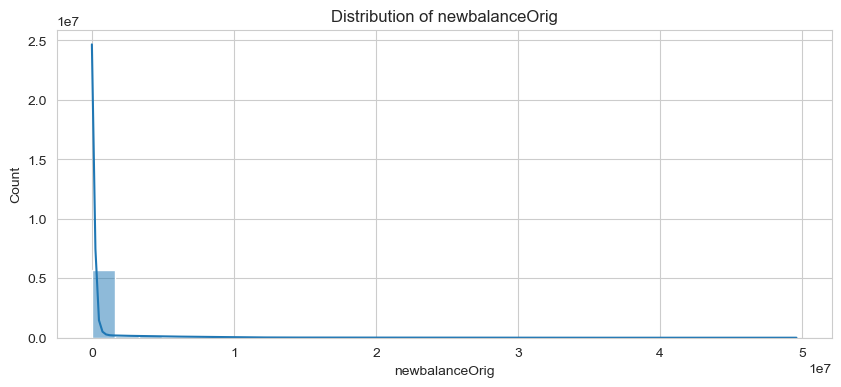

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


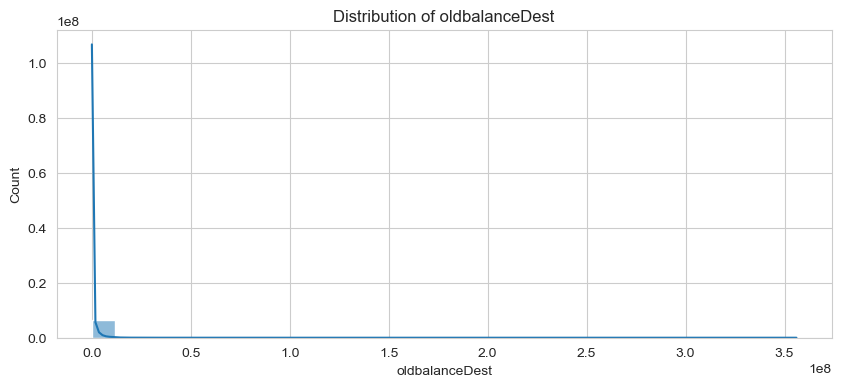

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


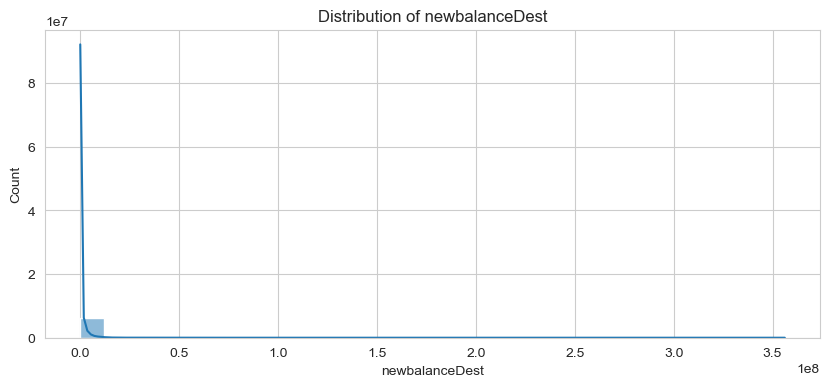

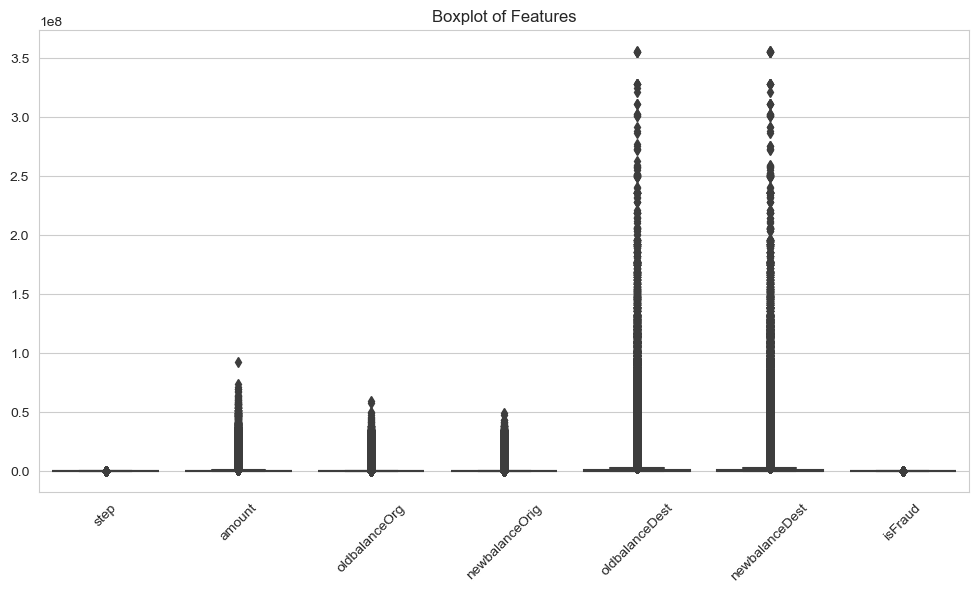

In [13]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of transactions')

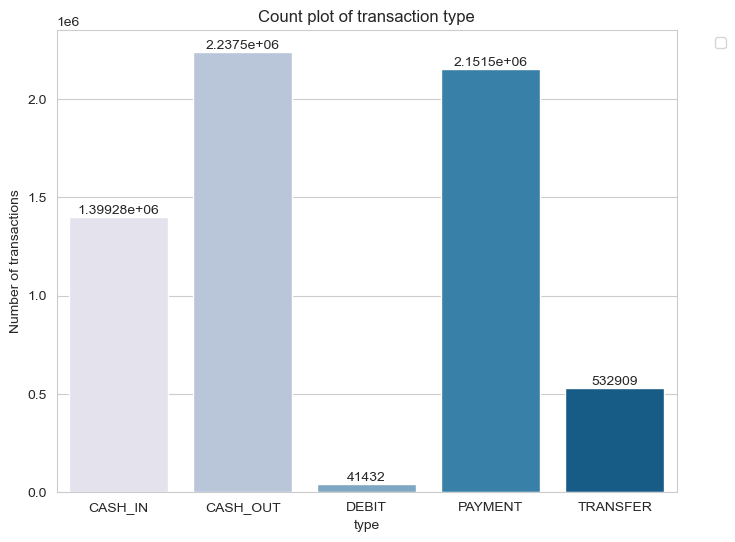

In [14]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


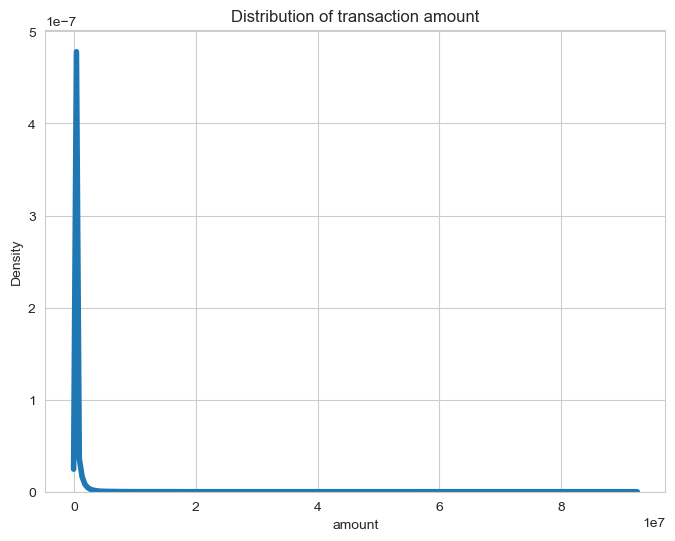

In [15]:
df['amount'] = df['amount'].replace([np.inf, -np.inf], np.nan)

sns.kdeplot(df['amount'].dropna(), linewidth=4)  
plt.title('Distribution of transaction amount')
plt.show()

* The distribution of transaction amounts is **right skewed**.
* This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.
* (mode < median < mean)

In [16]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

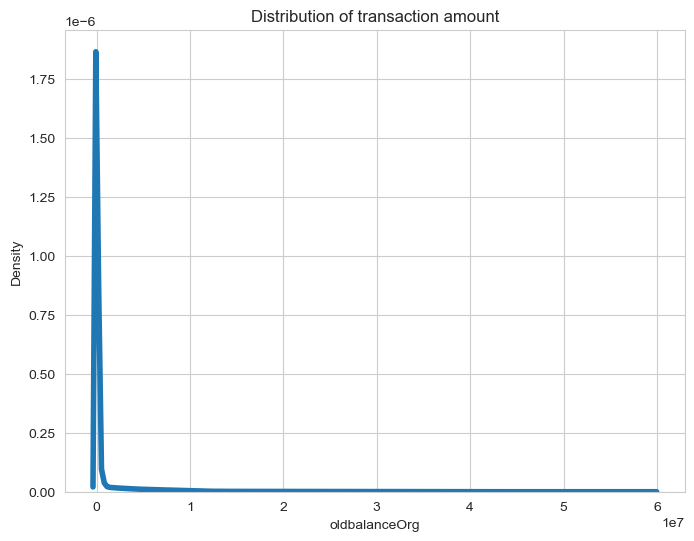

In [17]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

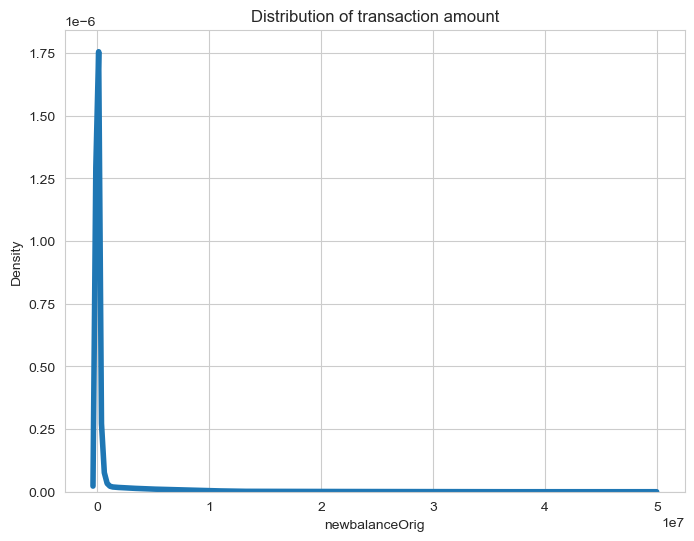

In [18]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

In [19]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

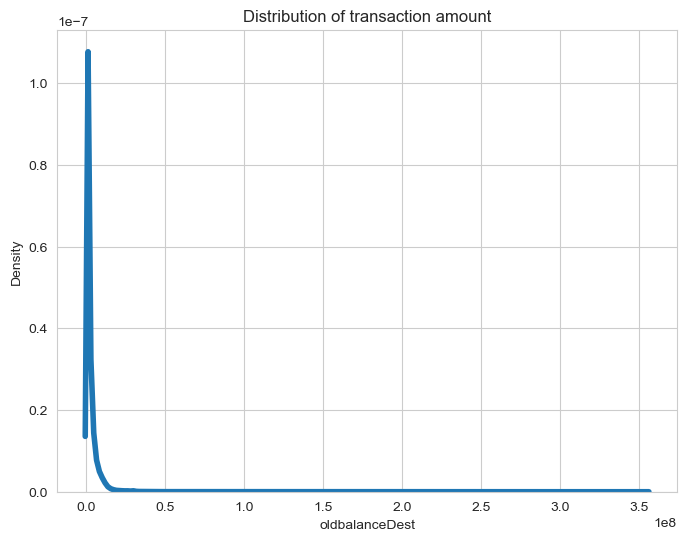

In [20]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

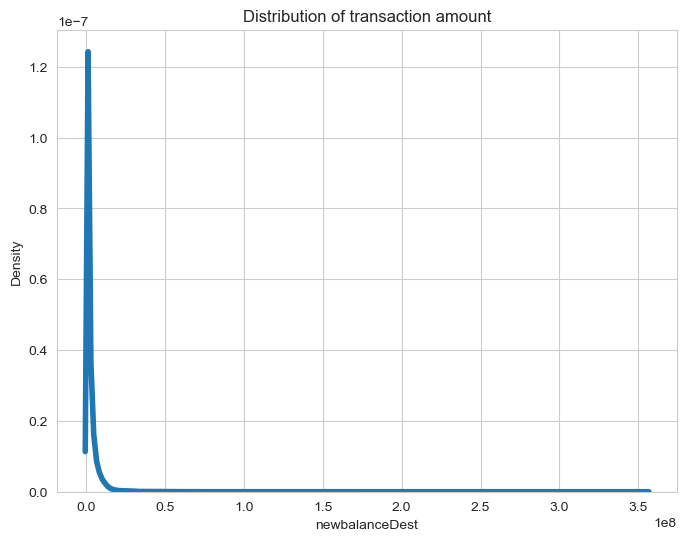

In [21]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

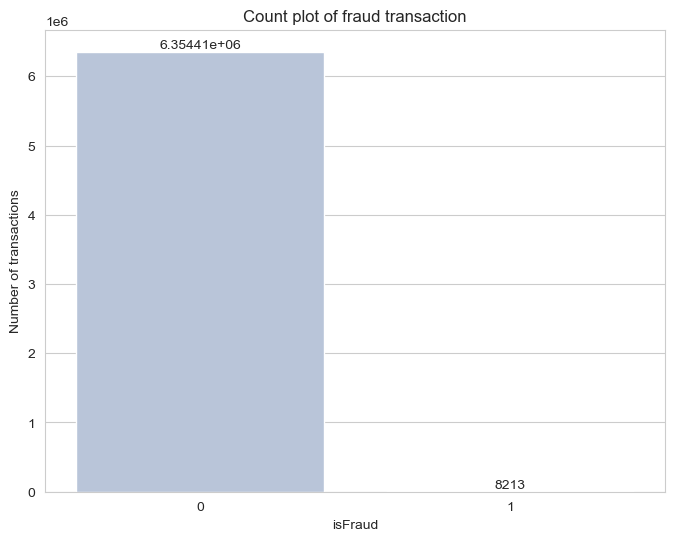

In [22]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

BIVARIATE DATA VISUALIZATION

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


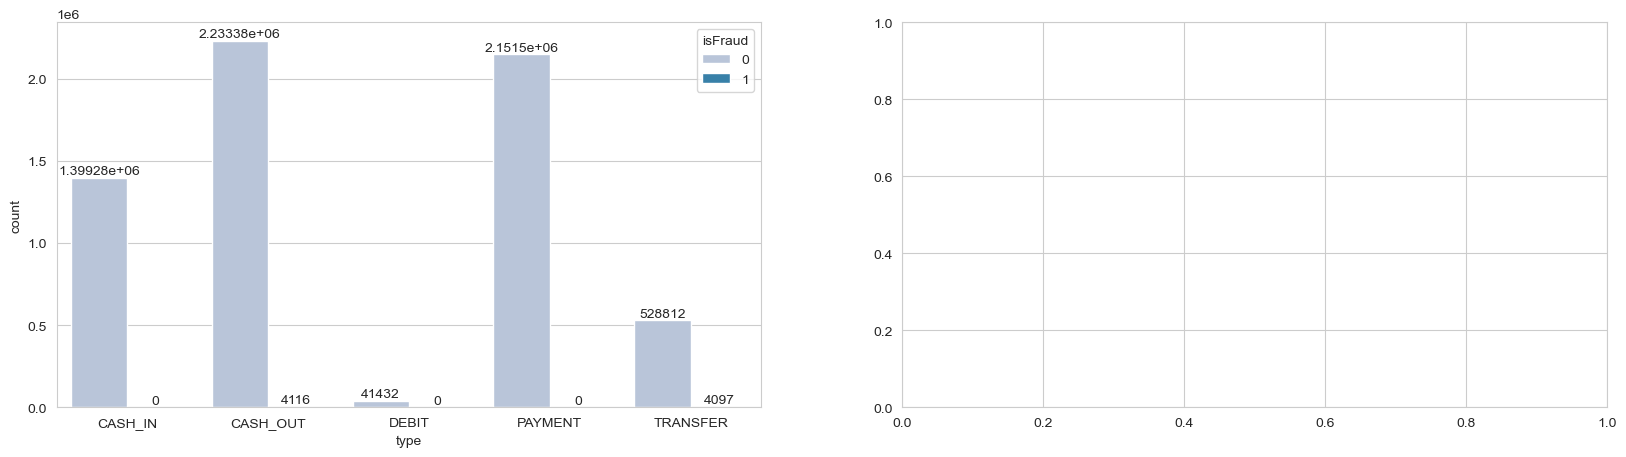

In [23]:

df['isFraud'] = df['isFraud'].astype(int)

df_plot = df.copy()
df_plot['isFraud'] = df_plot['isFraud'].astype(str)

# Plot using the converted dataframe
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='type', data=df_plot, hue='isFraud', palette='PuBu', ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container)

plt.show()


C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Number of transactions')

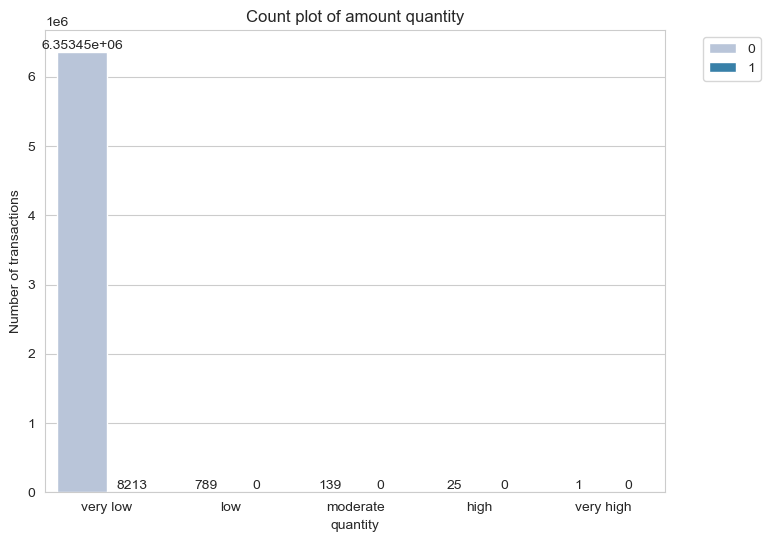

In [24]:
df_plot['quantity'] = pd.cut(df_plot['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df_plot, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Number of transactions')

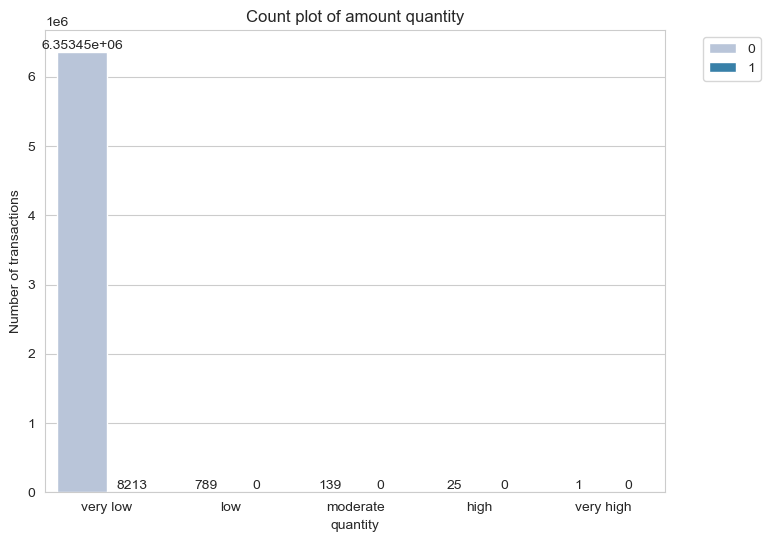

In [25]:
df_plot['quantity'] = pd.cut(df_plot['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df_plot, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

* All fraudulent transactions fall into the category of very low amounts.
* This suggests that in most cases, small transactions are more prone to fraudulent transactions.

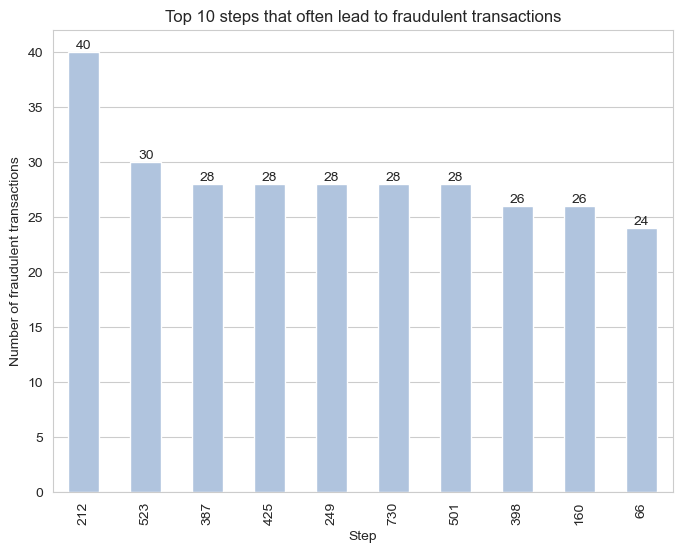

In [26]:
df1 = df_plot[df_plot['isFraud']=='1']
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Initial customers pre-transaction balance amount')

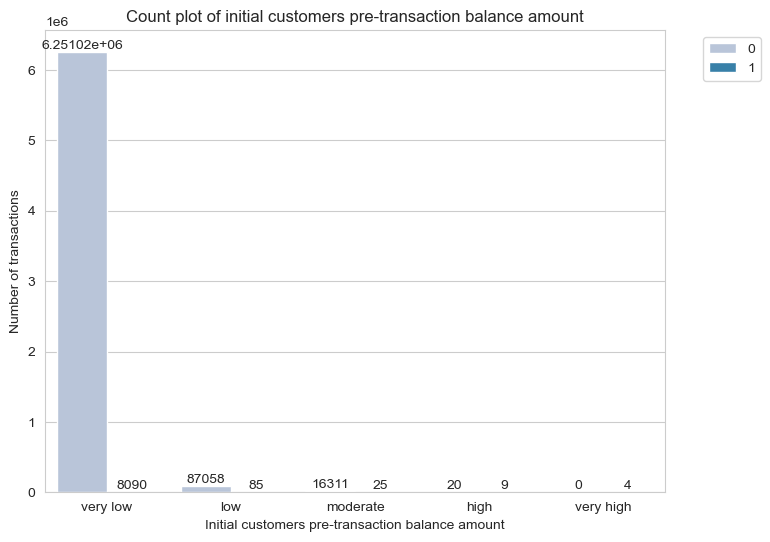

In [27]:
df_plot['oldbalanceOrg_amt'] = pd.cut(df_plot['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df_plot, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

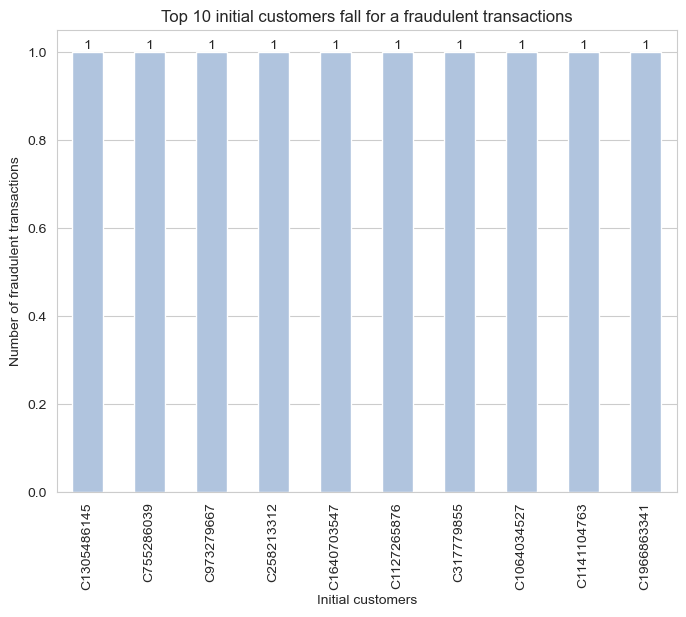

In [28]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Recipient pre-transaction balance amount')

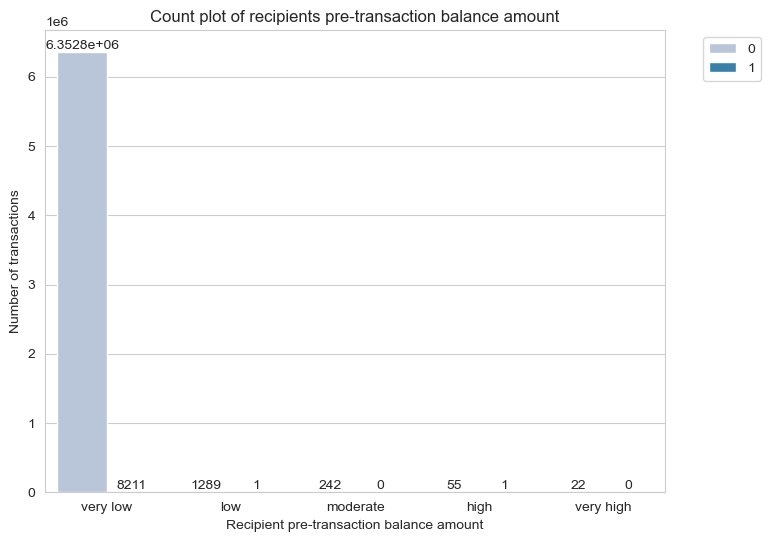

In [29]:
df_plot['oldbalanceDest_amt'] = pd.cut(df_plot['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df_plot, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

* Recipients with very low pre-transaction balances has the highest number of fraudulent transactions.* 
This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.

MULTIVARIATE DATA VISUALIZATION

C:\Users\bhong\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


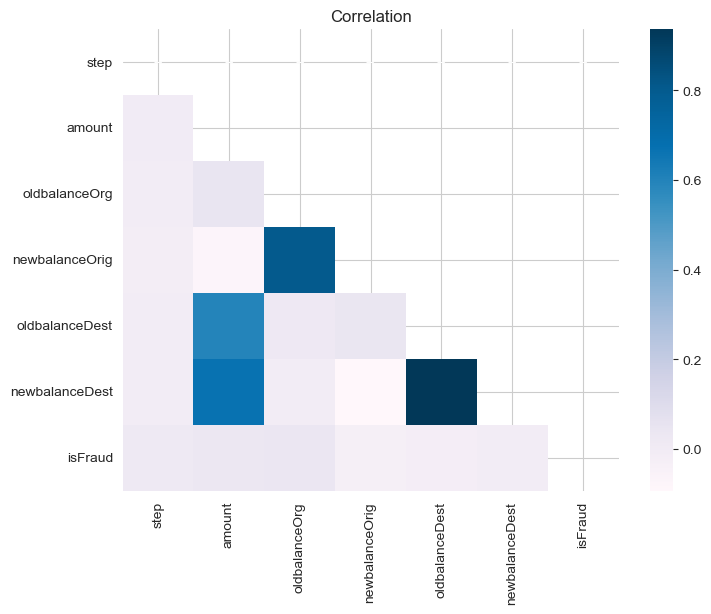

In [30]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr(method='spearman')

sns.heatmap(corr_matrix, cbar=True, annot=True, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')
plt.show()

* oldbalanceOrg and newbalanceOrig has strong positive relationship.
* 
oldbalanceDest and newbalanceDest has strong positive relationshi.
* 
oldbalanceOrg and amount has weak positive relationshi
* .
newbalanceOrig and amount has moderate positive relationship.

**MODEL BUILDING**


In [33]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [34]:
df['type']

0          0
1          0
2          4
3          3
4          0
          ..
6362615    3
6362616    4
6362617    3
6362618    4
6362619    3
Name: type, Length: 6362620, dtype: category
Categories (5, int64): [1, 3, 2, 0, 4]

In [35]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import tensorflow as tf

seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'amount', 'oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(probability=True, class_weight='balanced')  
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix)


Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86   1270881
           1       0.00      0.85      0.01      1643

    accuracy                           0.76   1272524
   macro avg       0.50      0.81      0.44   1272524
weighted avg       1.00      0.76      0.86   1272524

Confusion Matrix for SVM:
[[965895 304986]
 [   242   1401]]


In [37]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [38]:
classifiers = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=seed),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=seed),
    'XGBoost': XGBClassifier(random_state=seed),
    'LightGBM': LGBMClassifier(random_state=seed)
}

In [39]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest:
Mean accuracy score: 0.869 (0.007)
Mean precision score: 0.889 (0.009)
Mean recall score: 0.844 (0.013)
Mean f1 score: 0.866 (0.008)
Mean roc_auc score: 0.946 (0.003)


Logistic Regression:
Mean accuracy score: 0.791 (0.011)
Mean precision score: 0.767 (0.014)
Mean recall score: 0.835 (0.007)
Mean f1 score: 0.800 (0.009)
Mean roc_auc score: 0.891 (0.005)


SVM:
Mean accuracy score: 0.810 (0.004)
Mean precision score: 0.785 (0.008)
Mean recall score: 0.856 (0.013)
Mean f1 score: 0.818 (0.004)
Mean roc_auc score: 0.903 (0.004)


XGBoost:
Mean accuracy score: 0.875 (0.007)
Mean precision score: 0.887 (0.008)
Mean recall score: 0.860 (0.009)
Mean f1 score: 0.873 (0.007)
Mean roc_auc score: 0.951 (0.004)


LightGBM:
Mean accuracy score: 0.875 (0.004)
Mean precision score: 0.884 (0.007)
Mean recall score: 0.865 (0.012)
Mean f1 score: 0.874 (0.005)
Mean roc_auc score: 0.950 (0.003)




**HYPER-PARAMETER TUNING**

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 6]}
param_grid_lgb = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [10, 20]}

# Perform GridSearchCV for each model
grids = {
    'Random Forest': GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5),
    'Logistic Regression': GridSearchCV(LogisticRegression(), param_grid_lr, cv=5),
    'SVM': GridSearchCV(SVC(probability=True), param_grid_svm, cv=5),
    'XGBoost': GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5),
    'LightGBM': GridSearchCV(LGBMClassifier(), param_grid_lgb, cv=5)
}

# Fit models
for name, grid in grids.items():
    grid.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid.best_params_}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
[LightGBM] [Info] Number of positive: 5256, number of negative: 5256
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 10512, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5256, number of negative: 5256
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 second

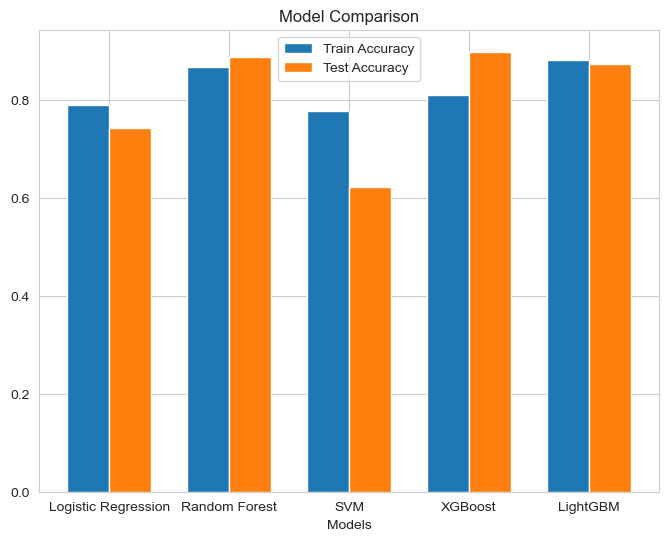

In [46]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM']
train_accuracies = [grids[model].score(X_train, y_train) for model in models]
test_accuracies = [grids[model].score(X_test, y_test) for model in models]
f1_scores = [f1_score(y_test, grids[model].predict(X_test)) for model in models]

# Plot Accuracy and F1 Score Comparison
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')
ax.set_xlabel('Models')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()


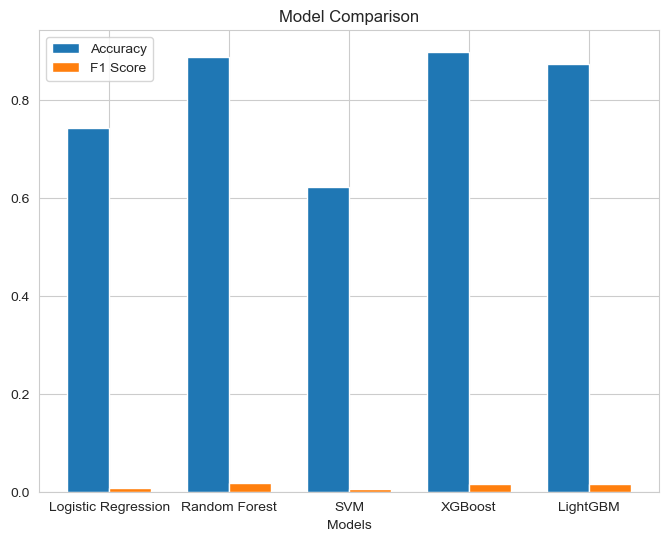

In [45]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM']
train_accuracies = [grids[model].score(X_train, y_train) for model in models]
test_accuracies = [grids[model].score(X_test, y_test) for model in models]
f1_scores = [f1_score(y_test, grids[model].predict(X_test)) for model in models]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, test_accuracies, width, label='Accuracy')
ax.bar(x + width/2, f1_scores, width, label='F1 Score')
ax.set_xlabel('Models')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()

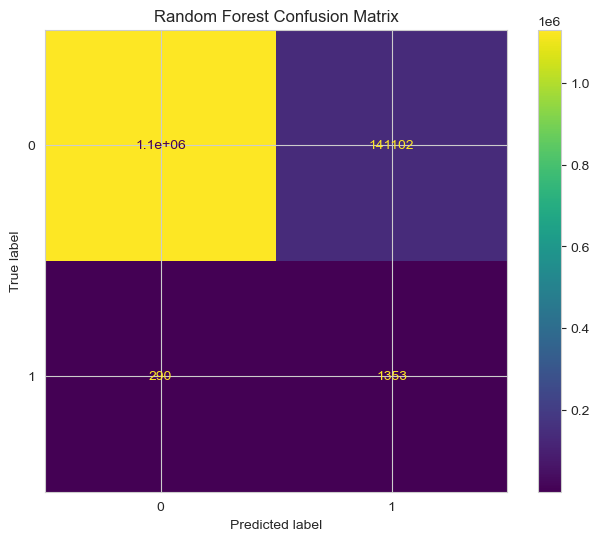

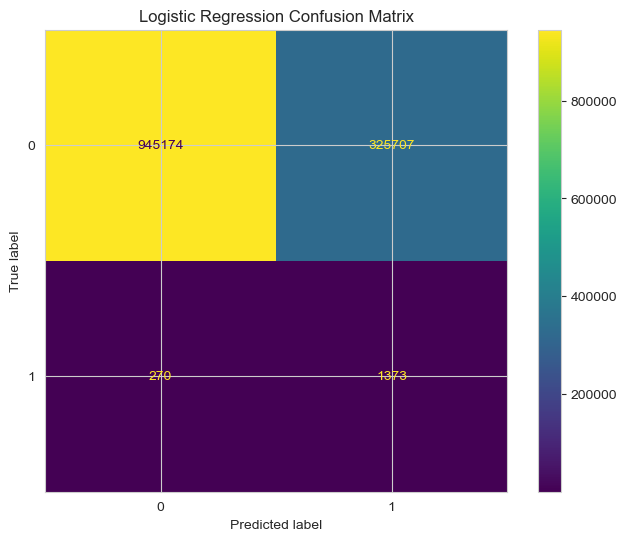

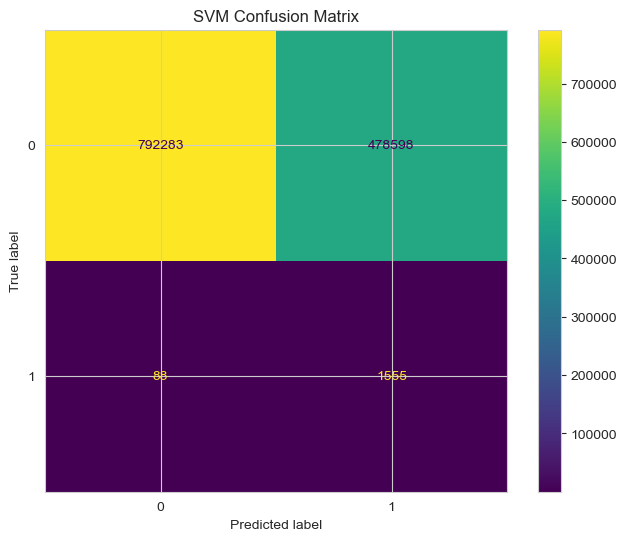

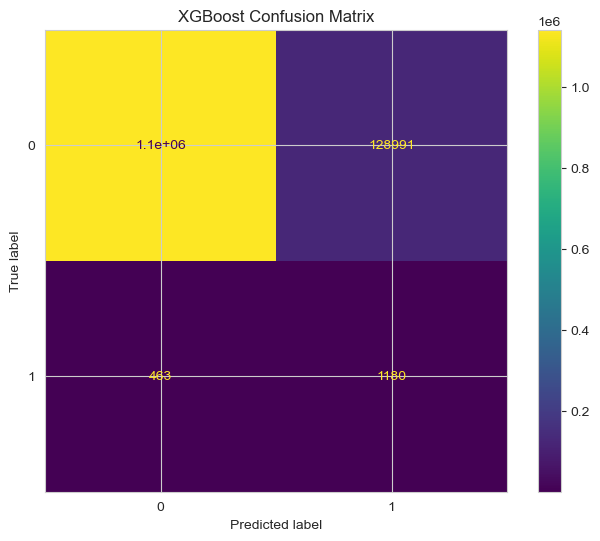

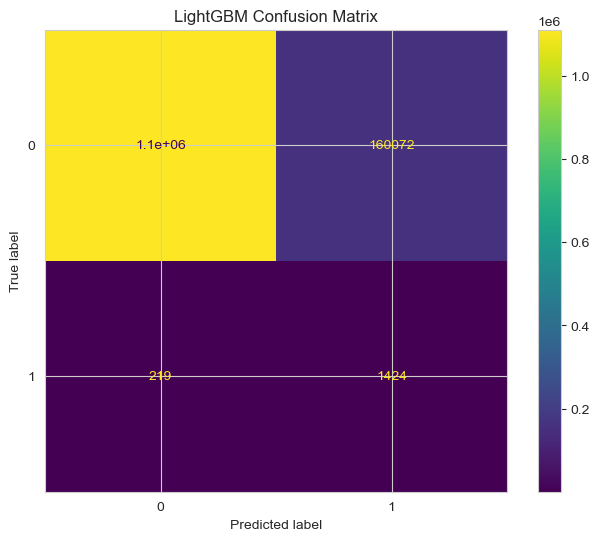

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, grid in grids.items():
    ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test)
    plt.title(f'{name} Confusion Matrix')
    plt.show()


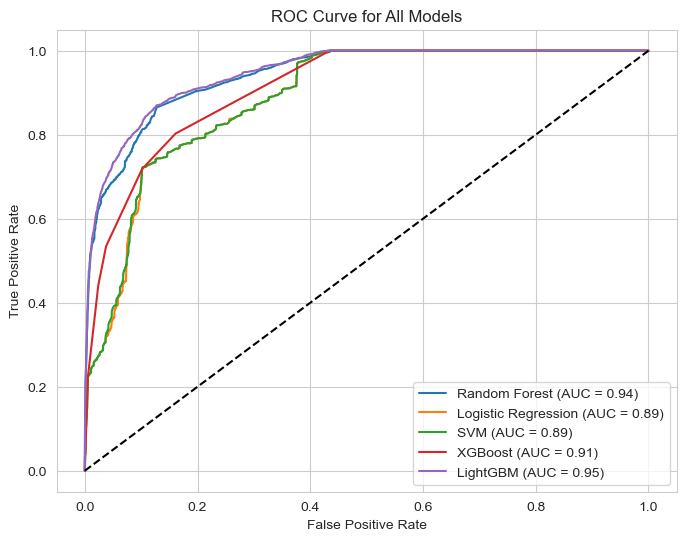

In [43]:
def plot_roc_curve(model, label):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure()
for name, grid in grids.items():
    plot_roc_curve(grid.best_estimator_, name)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


**CONCLUSION**

* From the results, XGBoost and LightGBM have the highest accuracy and F1 scores, both at 0.875, demonstrating strong performance in identifying fraudulent transactions. However, XGBoost slightly outperforms LightGBM in terms of mean ROC AUC score (0.951 vs. 0.950), indicating better model performance in distinguishing between positive and negative classes.

* Random Forest also shows strong performance, with a mean ROC AUC score of 0.946, which signifies good separability between fraudulent and non-fraudulent payments. However, it has a slightly lower mean accuracy and F1 score compared to XGBoost and LightGBM.

* Overall, all models exhibit satisfactory performance, but XGBoost and LightGBM are recommended for identifying fraudulent and non-fraudulent payments due to their superior metrics.